## Homework 06: Optimization in Python

## Due Date: March 29, 2023, 11:59pm

#### Firstname Lastname: Woodward (Buz) Galbraith

#### E-mail: wbg231@nyu.edu

#### Enter your solutions and submit this notebook

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax


---

**Problem 1 (30p)**

We examine a product of non-negative numbers given their sum. Concretely, the problem is to find all $(x, y, z)$ among all non-negative reals $x, y, z \geq 0$ such that
their product $P(x, y, z) = x y z$ is maximized, given their sum $x + y + z = 270$. 


1.1. (15p)
Cast the problem as a nonlinear two-dimensional optimization problem over with box constraints (*hint*: remove the sum constraint, and ignore one of the positivity constraints which should not be violated with proper initialization) and solve it using the L-BFGS-B method of `scipy.optimize.minimize`.

1.2. (15p)
Cast the problem as an equivalent one-dimensional constrained optimization problem (*hint*: after removing the sum constraint, can you further use optimality conditions to remove one more variable?), and solve it using `scipy.optimize.minimize_scalar`.



## question 1.1
- we can think of our initial objective function as $j(v) = v_{1 } *v_{2} * v_3$  where $v\in \mathbb{R}^{3}$ and thus our optimzation problem is $max_{v\in \mathbb{R}^3} j(v): v_1+_2+v_3=270, v_i\geq 0 \forall i\in [1,3]\iff min_{v\in \mathbb{R}^3} -j(v): v_1+_2+v_3=270, v_i\geq 0 \forall i\in [1,3]$ 
- we can take out our equality constraint by writing $j_1(w)=v_1*v_2*(270-v_2-v_1)$  $min_{v\in \mathbb{R}^3} -j(v): v_1+_2+v_3=270, v_i\geq 0 \forall i\in [1,3]\iff min_{v\in \mathbb{R}^2} -j_1(v):  v_i\geq 0 \forall i\in [1,2]$

In [30]:
def objective(v):
    x,y=v
    z=270-x-y
    return -(x*y*z)
bound=((0,None),(0,None) )
res=sp.optimize.minimize(objective, x0=[230/3, 230/3], method="L-BFGS-B",bounds=bound)
print("optimal arguments are v*={0} \nobjective value at v* is j(v*)={1}".format(res.x, res.fun))

optimal arguments are v*=[89.99999438 89.99999343] 
objective value at v* is j(v*)=-728999.9999999899


## question 1.2 
- from last question we have objective $j_1(w)=v_1*v_2*(270-v_2-v_1)$  and optimization problem $min_{v\in \mathbb{R}^2} -j_1(v):  v_i\geq 0 \forall i\in [1,2]$
- note further that $\frac{\partial f_1}{\partial v_2}=270v_1-v_2^2-2v_1v_2$ our first order optimality condition is 
- $\frac{\partial f_1}{\partial v_2}=0$ so $270v_1-v_2^2-2v_1v_2=0\Rightarrow v_2^{*}=\frac{270-v_1}{2}$
- so we can write our objective again as  $j_2(v_1)=(v_1)*\frac{270-v_1}{2}*(270-(v_1)-\frac{270-v_1}{2})$ and optimization problem $min_{v\in \mathbb{R}} -j_2(v):  v_1\geq 0$

In [31]:
def objective(x):
    y=(270-x)/2
    z=270-x-y
    return -(x*y*z)
bound=(0,270) 
res=sp.optimize.minimize_scalar(objective,bounds=bound)
print("optimal arguments are v*={0} \nobjective value at v* is j(v*)={1}".format(res.x, res.fun))

optimal arguments are v*=89.99999933725694 
objective value at v* is j(v*)=-728999.9999999998


---

**Problem 2 (70p)**

Let us consider the following function,

$$h(x, y) := (x^2 + y - 10)^2 + (x + y^2 - 17)^2.$$
    
find **all extremal** points (both minima and maxima) in the region $-10 \leq x, y \leq 10$.


The goal is to: (a) find extremal points; (b) compare convergence, i.e. the numbers of: Iterations, Function evaluations, Gradient evaluations, Hessian evaluations.


Solve the problem by using the Newton optimization routine "scipy.optimize.fmin_ncg":

2.1. (20p) providing gradient (fprime) and Hessian (fhess) in "scipy.optimize.fmin_ncg"

2.2. (20p) providing only gradient (fprime) in "scipy.optimize.fmin_ncg"

Solve the problem by using the quasi-Newton optimization routine "fmin_bfgs":

2.3. (20p) **not** providing gradient (fprime) or Hessian (like in "scipy.optimize.fmin_ncg").


Use JAX for computing the gradient and Hessian as in the lecture. (make sure the gradient and Hessian are correctly computed).


2.4. (10p) Plot $h(x, y)$ in the given region $-10 \leq x, y \leq 10$.


**Hint**: Note there are multiple extremal points in the given region. So one has to run the Newton routine with different starting points in order to find different extremal points. 


For every extremal point report: 
- (xopt, yopt)
- h(xopt, yopt)
- (xstart, ystart)
- the number of Iterations
- the number of Function evaluations
- the number of Gradient evaluations
- the number of Hessian evaluations.

**Hint 2:** There are both local mimima and maxima; notice that "scipy.optimize.fmin_ncg" finds "minimum" not the "maximum". To locate stationary points, partition $-10 \leq x, y \leq 10$ into multiple regions and use "optimize.brute" in each of these regions. Then use the resulting points as starting points in "scipy.optimize.fmin_ncg".


## question 2.1
- let the objective be $j(x,y)=(x^2+y-10)^2+(x+y^2-17)^2$ so our optimzation problem is $max j(x,y):x,y\in[-10,10] \iff min -j(x,y):x,y\in [-10,10]$
- we know that our gradient is $\nabla j(w)=\begin{pmatrix}\frac{\partial j}{\partial x}\\\frac{\partial j}{\partial y}\end{pmatrix}\in \mathbb{R}^2$ 
- so in this case we have $\nabla j(w)=\begin{pmatrix}\frac{\partial j}{\partial x}\\\frac{\partial j}{\partial y}\end{pmatrix}=\begin{pmatrix}4x(x^2+y-10)+2(x+y^2-17)\\2(x^2+y-10)+4y(x+y^2-17)\end{pmatrix}$
- then we can find our hessian as $\mathcal{H}=\begin{pmatrix}\frac{\partial j}{\partial x^2}&\frac{\partial j}{\partial xy}\\\frac{\partial j}{\partial yx}&\frac{\partial j}{\partial y^2}\end{pmatrix}\in 
\mathbb{R}^{2\times 2}$
- so in this case we have  $\mathcal{H}=\begin{pmatrix}\frac{\partial j}{\partial x^2}&\frac{\partial j}{\partial xy}\\\frac{\partial j}{\partial yx}&\frac{\partial j}{\partial y^2}\end{pmatrix}=\begin{pmatrix}12x^2+4y-38 & 4x+4y\\ 4x+4y & 4x+12y^2-66 \end{pmatrix}$

In [58]:
def boundary_violated(x,y):
    "returns true if boundary is violated"
    return ((x<-10) or (x>10) or (y<-10) or (y>10))
boundary_violated = np.vectorize(boundary_violated)
def j(v):
    x,y=v
    term_1= ((x**2) +y-10)
    term_2=(x+(y**2)-17)
    return (term_1**2) + (term_2**2)     
def j_prime(v):
    x,y=v
    term_1=4*x*((x**2)+y-10)+2*(x+(y**2)-17)
    term_2=2*((x**2)+y-10)+4*y*(x+(y**2)-17)
    return np.array([term_1, term_2])
def j_hessian(v):
    x,y=v
    term_1_1=12*(x**2)+4*y-38
    term_1_2=4*(x+y)
    term_2_1=4*(x+y)
    term_2_2=4*x+12*(y**2)-66
    return np.array([
        [term_1_1, term_1_2],
        [term_2_1, term_2_2]
        ])

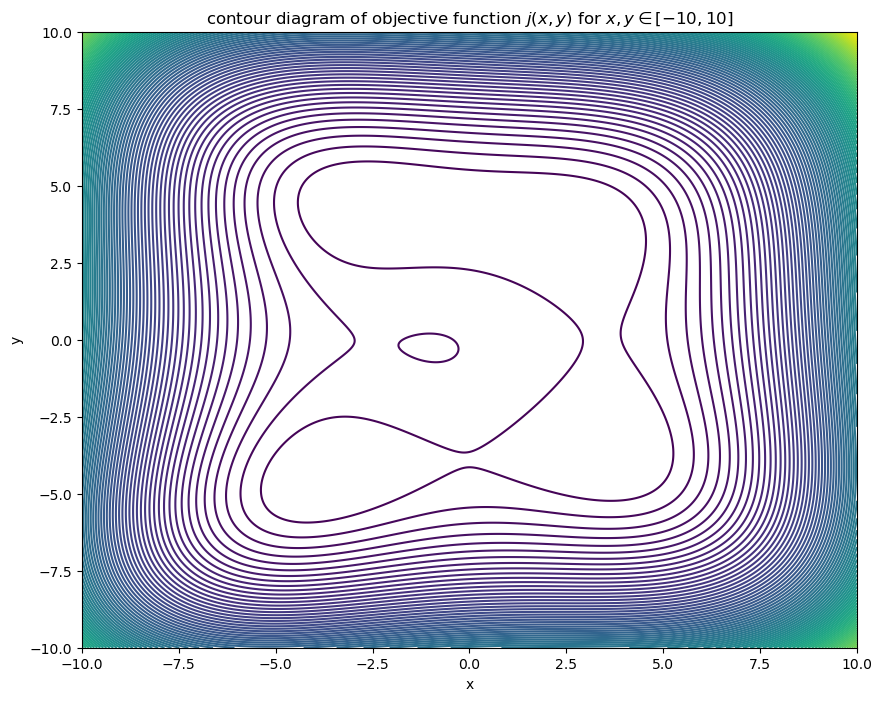

In [59]:
x1 = x2 = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots(figsize=(10, 8))
X1, X2 = np.meshgrid(x1, x2)
def j_plot(v):
    x,y=v
    term_1= ((x**2) +y-10)
    term_2=(x+(y**2)-17)
    return (term_1**2) + (term_2**2)   
plt.contour(X1, X2, j_plot([X1, X2]), 100)
plt.title("contour diagram of objective function $j(x,y)$ for $x,y\in [-10,10]$")
plt.xlabel("x")
plt.ylabel("y")
def plot_with_points(otpimas):
    fig, ax = plt.subplots(figsize=(10, 8))
    x1 = x2 = np.linspace(-10, 10, 1000)
    X1, X2 = np.meshgrid(x1, x2)
    plt.contour(X1, X2, j_plot([X1, X2]), 100)
    plt.title("contour diagram of objective function $j(x,y)$ for $x,y\in [-10,10]$")
    plt.xlabel("x")
    plt.ylabel("y")
    for optima in otpimas:
        ax.plot(optima[0], optima[1], '*', markersize=15, label=optima)
    plt.show()
    


## 2.1 

initialized at [0, 0]
Optimization terminated successfully.
         Current function value: -407.343841
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 8


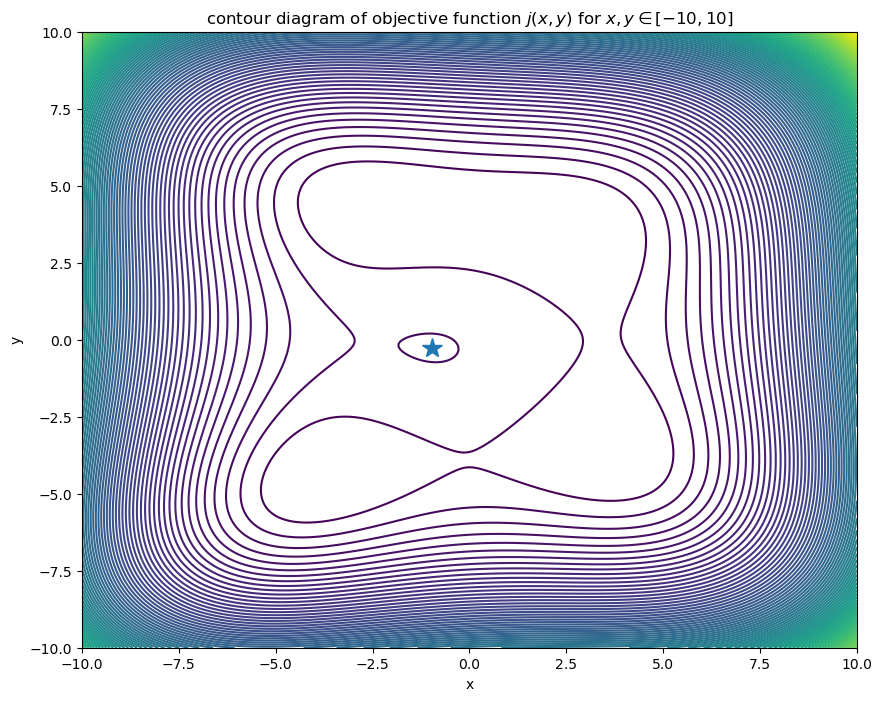

In [60]:

def fmax_ncg(j,x0,jprime,jhess=None):
    print("initialized at {0}".format(x0))
    f=lambda v: -j(v)
    fprime=lambda v: -j_prime(v)
    fhess=lambda v: -j_hessian(v)
    res=sp.optimize.fmin_ncg(f, x0, fprime, fhess=fhess)
    return res
res=fmax_ncg(j=j,x0=[0,0],jprime=j_prime,jhess= j_hessian)
plot_with_points([res])

## 2.2 

initialized at [0, 0]
Optimization terminated successfully.
         Current function value: -407.343841
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 8


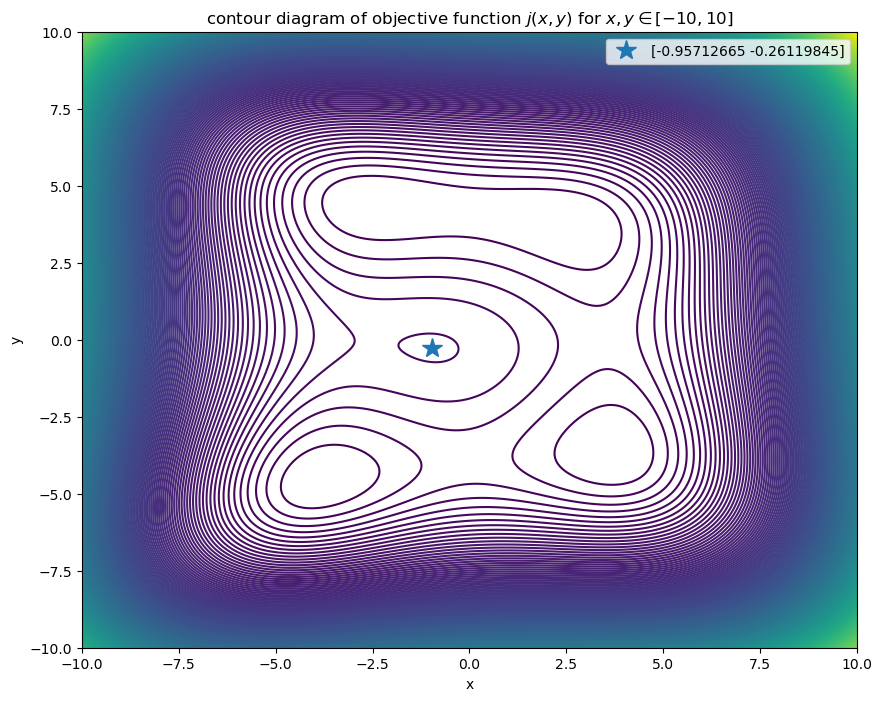

In [123]:
res=fmax_ncg(j=j,x0=[0,0] ,jprime=j_prime)
plot_with_points([res])

In [11]:
sp.optimize.fmin_bfgs(f=j, x0=[-10,10],fprime=j_prime, retall=True)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 22
         Gradient evaluations: 22


(array([-2.36628132,  4.40071375]),
 [array([-10,  10]),
  array([-9.21499217,  9.36449807]),
  array([-9.29260185,  9.25631935]),
  array([-8.36636126,  8.48268475]),
  array([-6.17296324,  6.59115257]),
  array([-4.89431572,  5.54546109]),
  array([-3.91882397,  4.81065427]),
  array([-3.30325617,  4.41144574]),
  array([-2.9339916,  4.2328374]),
  array([-2.71684229,  4.18354114]),
  array([-2.52446621,  4.19916403]),
  array([-2.35193638,  4.28044856]),
  array([-2.30065645,  4.36274209]),
  array([-2.32767975,  4.39310605]),
  array([-2.36099387,  4.40237422]),
  array([-2.36613424,  4.40105375]),
  array([-2.36629096,  4.40072344]),
  array([-2.36628132,  4.40071375])])

## 2.3

In [85]:
sp.optimize.fmin_bfgs(f=j, x0=[-10,-10], retall=True)

         Current function value: -608309923142.315186
         Iterations: 1
         Function evaluations: 348
         Gradient evaluations: 112


(array([-777.31869414, -703.45107918]),
 [array([-10, -10]), array([-777.31869414, -703.45107918])])

In [62]:
import jax.numpy as jnp
from jax import jit, grad, hessian

ff = jit(j)
ffprime = jit(grad(j))
ffhess = jit(hessian(j))
x = np.array([1., 1.])
ff(x), ffprime(x), ffhess(x)

(DeviceArray(289., dtype=float32),
 DeviceArray([-62., -76.], dtype=float32),
 DeviceArray([[-22.,   8.],
              [  8., -50.]], dtype=float32))

In [63]:
sp.optimize.fmin_ncg(f=j, x0=[-1.,-1.],fprime=jax.grad(j),fhess=jax.hessian(j))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 13
         Gradient evaluations: 13
         Hessian evaluations: 8


array([-3.81607969, -4.56246404])

In [64]:
sp.optimize.brute(func=j, ranges=[(-10,10), (-10,10)])

array([ 3.69429173, -3.64771068])

In [65]:
import itertools 
x_range=np.linspace(-10,10,41)
temp=[(x_range[i], x_range[i+1]) for  i in range(len(x_range)-1)]
brute_list=list(itertools.product(temp,temp))
brute_list[-1]
len(brute_list)

1600

In [66]:
initilization_points=[]
for current in brute_list:
    print(current)
    f=lambda x: -j(x)
    initilization_points.append(sp.optimize.brute(func=f, ranges=current)) # get mins
    initilization_points.append(sp.optimize.brute(func=j, ranges=current)) ## get max 

((-10.0, -9.5), (-10.0, -9.5))
((-10.0, -9.5), (-9.5, -9.0))
((-10.0, -9.5), (-9.0, -8.5))
((-10.0, -9.5), (-8.5, -8.0))
((-10.0, -9.5), (-8.0, -7.5))
((-10.0, -9.5), (-7.5, -7.0))
((-10.0, -9.5), (-7.0, -6.5))
((-10.0, -9.5), (-6.5, -6.0))
((-10.0, -9.5), (-6.0, -5.5))
((-10.0, -9.5), (-5.5, -5.0))
((-10.0, -9.5), (-5.0, -4.5))
((-10.0, -9.5), (-4.5, -4.0))
((-10.0, -9.5), (-4.0, -3.5))
((-10.0, -9.5), (-3.5, -3.0))
((-10.0, -9.5), (-3.0, -2.5))
((-10.0, -9.5), (-2.5, -2.0))
((-10.0, -9.5), (-2.0, -1.5))
((-10.0, -9.5), (-1.5, -1.0))
((-10.0, -9.5), (-1.0, -0.5))
((-10.0, -9.5), (-0.5, 0.0))
((-10.0, -9.5), (0.0, 0.5))
((-10.0, -9.5), (0.5, 1.0))
((-10.0, -9.5), (1.0, 1.5))
((-10.0, -9.5), (1.5, 2.0))
((-10.0, -9.5), (2.0, 2.5))
((-10.0, -9.5), (2.5, 3.0))
((-10.0, -9.5), (3.0, 3.5))
((-10.0, -9.5), (3.5, 4.0))
((-10.0, -9.5), (4.0, 4.5))
((-10.0, -9.5), (4.5, 5.0))
((-10.0, -9.5), (5.0, 5.5))
((-10.0, -9.5), (5.5, 6.0))
((-10.0, -9.5), (6.0, 6.5))
((-10.0, -9.5), (6.5, 7.0))
((-10.0,

In [67]:
otpimas_to_try=[]
i=1
for x0 in initilization_points:
    print(i)
    otpimas_to_try.append(fmax_ncg(j=j,x0=x0,jprime=j_prime,jhess= j_hessian))
    otpimas_to_try.append(sp.optimize.fmin_ncg(j, x0, j_prime, fhess=j_hessian))
    i+=1

1
initialized at [-6.06862353e+44 -1.12961760e+44]
Optimization terminated successfully.
         Current function value: -135794396432293471500357100627443728194601284712895847845400328839573178680410484867760308164279538176281841023319882415229353125464943311695635955225793052669205776659539860389888.000000
         Iterations: 1
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1
         Current function value: 135794396432293471500357100627443728194601284712895847845400328839573178680410484867760308164279538176281841023319882415229353125464943311695635955225793052669205776659539860389888.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Hessian evaluations: 1
2
initialized at [-3.81608742 -4.56243485]
Optimization terminated successfully.
         Current function value: -465751972425121052818674418277611006752094442029554547505136063391026893589482558378537959998523091016313499286

In [68]:
otpimas_to_try=np.array(otpimas_to_try)
otpimas_to_try=otpimas_to_try[np.all(otpimas_to_try <= 10, axis = 1), :]
otpimas_to_try=otpimas_to_try[np.all(otpimas_to_try >= -10, axis = 1), :]
# otpimas_to_try=np.unique(otpimas_to_try)

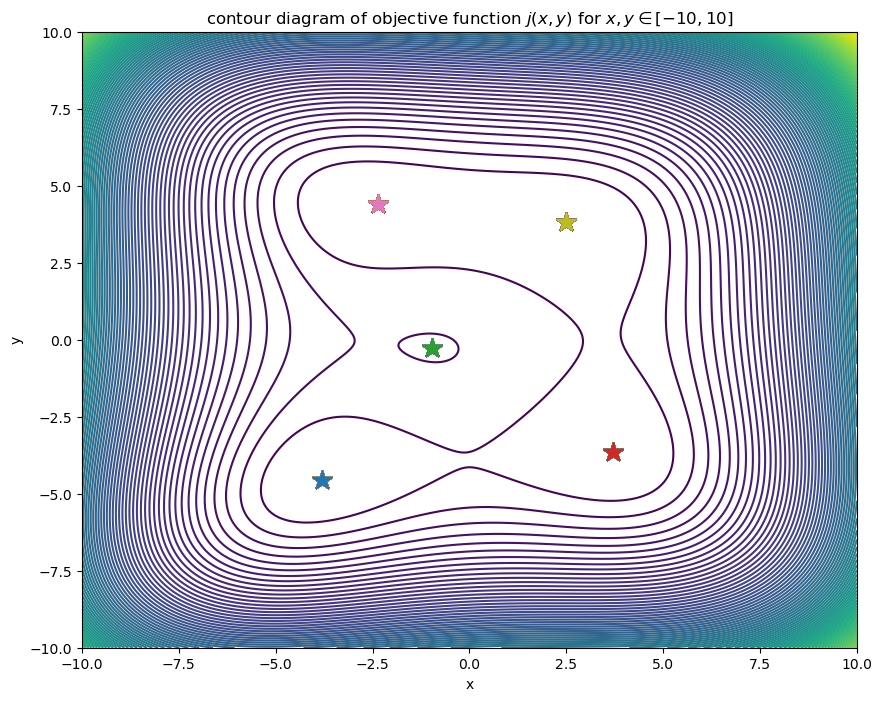

In [69]:
plot_with_points(otpimas_to_try)

[[-3.816079691602127, -4.562464212638446],
 [-3.8160796915994384, -4.562464212637666],
 [-3.8160796915994384, -4.562464212637666],
 [3.69427945881121, -3.6477007197944418],
 [-3.816079691599439, -4.562464212637666],
 [-3.816079691596801, -4.562464212645453],
 [-3.8160796915994384, -4.562464212637666],
 [-3.816079691599439, -4.562464212637666],
 [-3.816079691599439, -4.562464212637666],
 [-3.816079691599439, -4.562464212637666],
 [-3.816079691599439, -4.562464212637666],
 [-3.8160796916038775, -4.562464212630579],
 [-0.9571266537480405, -0.2611984516584067],
 [-3.8160796915994384, -4.562464212637666],
 [-3.8160796915994384, -4.562464212637666],
 [-3.8160796914851765, -4.5624642128633415],
 [-3.816079691599446, -4.562464212637669],
 [-3.8160796916000366, -4.5624642126378925],
 [3.6942794588131282, -3.647700719802972],
 [3.694279458811227, -3.6477007197944875],
 [3.694279458811248, -3.6477007197944964],
 [3.694279458811237, -3.6477007197944844],
 [-0.9571266537230002, -0.26119845166129996

In [202]:
otpimas_to_try.shape

(1600, 2)